# Clustering

Dans cet essai qui constitue le baseline des clusters pour le jeu de données, 

- Toutes les variables disponibles sont utilisées
- L'algorithme du k-means est utilisé (même si les variables ne sont pas tout à fait adéquates pour ce genre de méthode étant donné qu'elles sont binaires et ordinales plutôt que continues)

À la fin de cette étape, nous aurons : 

- Les valeurs des moyennes et ecart-type pour le scaling des variables (`03_pilot1_scale_origins.rds` et `03_pilot1_scale_ecarts_types.rds`)
- Le modèle de k-means (`03_pilot1_kmeans.rds`)
- Le fichier de données original augmenté des variables de cluster (`03_pilot1_2022.rds`)
- Un fichier csv (pour ouverture dans excel par exemple) qui contient la moyenne par cluster par variable afin de déterminer "à la main" quels sont les éléments distinctifs de chaque cluster (`03_pilot1_clusters_desc.csv`)

In [1]:
library(dplyr)
library(factoextra)

df_pilot_2025 <- readRDS(file = "../../_PrivateFolder_datagotchi_federal_2025/data/clustering/can2025/02_pilot_2025.rds")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [5]:
# Sélection des variables pour le clustering
source("03-0_variables.R")
df_pilot_2025_clust <- df_pilot_2025 %>% select(all_of(variables_clust_bourdieu))

In [6]:
# Scaling des variables
df_scaled <- scale(df_pilot_2025_clust)

# Récupérer les moyennes et écarts-types
origines <- attr(df_scaled, "scaled:center")  # Moyennes utilisées pour centrer
ecarts_types <- attr(df_scaled, "scaled:scale")  # Écarts-types utilisés pour réduire

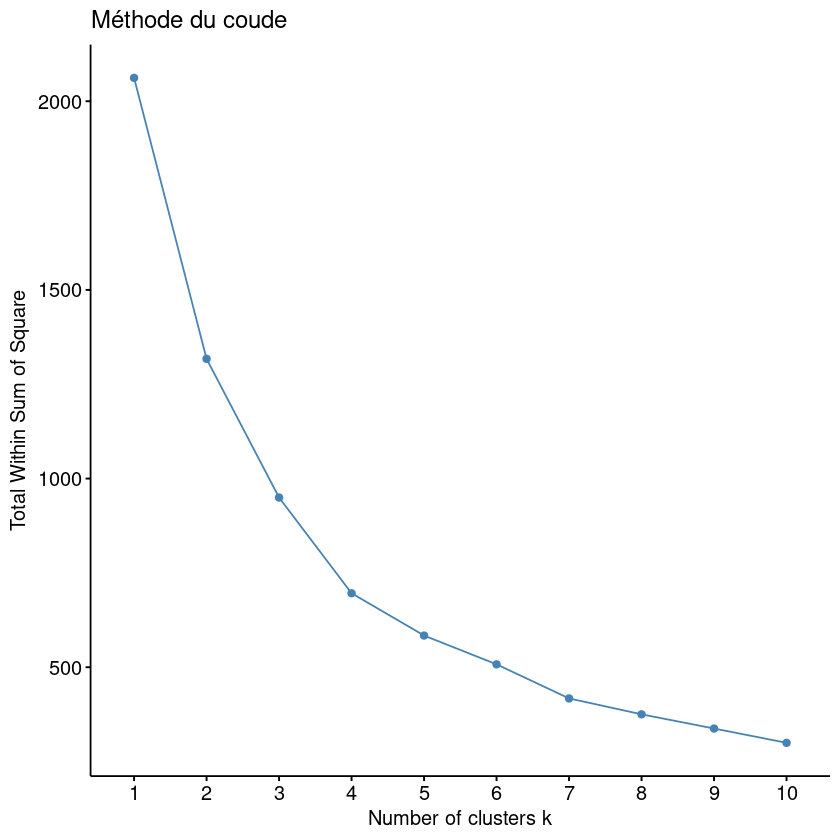

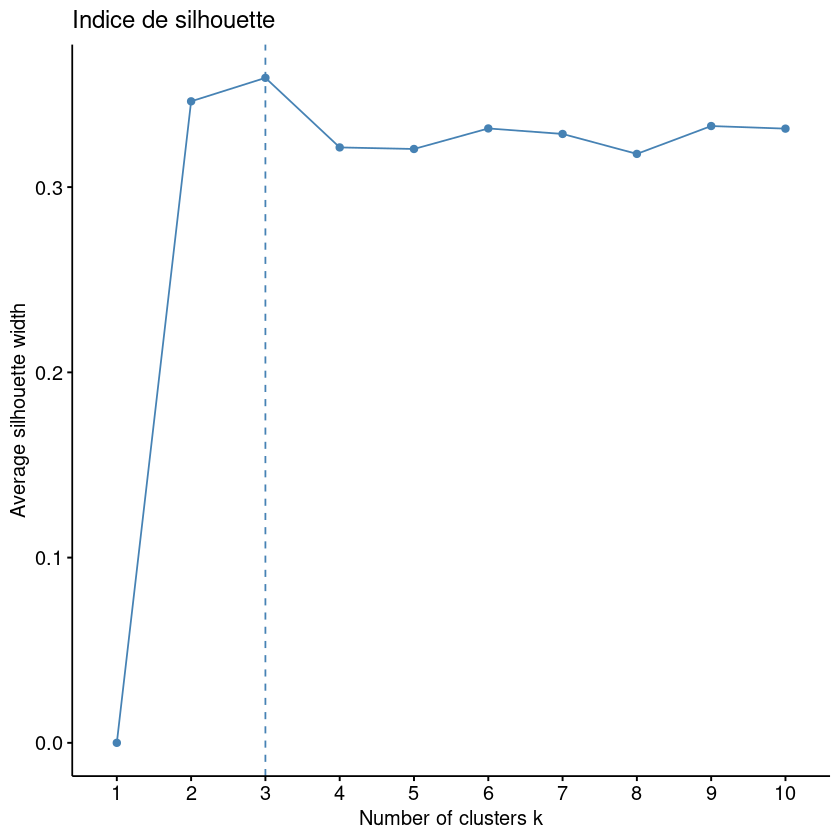

In [7]:
# Détermination du nombre optimal de clusters
# Méthode de l’élbow (coude) et l’indice de silhouette.

# Méthode du coude
fviz_nbclust(df_scaled, kmeans, method = "wss") +
  ggtitle("Méthode du coude")

# Indice de silhouette
fviz_nbclust(df_scaled, kmeans, method = "silhouette") +
  ggtitle("Indice de silhouette")

In [11]:
# Application de K-Means Clustering

# Choisissez un nombre de clusters approprié (par exemple, 3).
k <- 6

# K-Means Clustering
set.seed(123)  # Pour la reproductibilité
kmeans_result <- kmeans(df_scaled, centers = k, nstart = 25)

In [12]:
kmeans_result

K-means clustering with 6 clusters of sizes 129, 149, 166, 238, 155, 195

Cluster means:
   score_diff   score_sum
1 -0.74800806 -1.55435024
2 -1.50855617  0.08372160
3  1.03310050 -0.86847647
4 -0.09841455 -0.02451257
5 -0.10783367  1.37129791
6  0.97389799  0.64352089

Clustering vector:
   [1] 2 4 3 2 3 4 4 5 1 1 4 1 6 5 1 3 2 6 4 6 2 6 5 1 3 3 2 5 3 6 6 6 1 5 4 5 4
  [38] 5 6 4 3 6 3 2 6 1 6 6 4 2 2 6 1 6 4 2 4 5 6 4 3 1 5 2 4 6 4 5 1 4 4 1 4 2
  [75] 2 4 3 6 3 3 6 2 5 6 4 5 5 4 3 4 6 3 3 2 4 5 4 3 5 1 5 6 5 6 1 6 5 1 6 6 5
 [112] 3 5 3 3 4 5 5 5 2 4 5 1 6 5 6 1 6 6 3 1 4 3 4 5 5 2 6 4 6 4 6 4 6 1 4 4 4
 [149] 4 3 6 5 1 1 6 4 6 4 2 6 6 6 2 2 4 2 1 5 2 3 6 6 6 3 6 3 4 6 6 1 4 4 6 4 5
 [186] 6 6 2 3 3 5 6 6 4 4 6 1 4 4 5 4 3 4 4 4 5 2 5 4 2 5 4 6 4 6 4 5 3 5 4 2 6
 [223] 2 4 3 6 4 5 2 4 3 6 4 4 4 1 5 6 3 1 5 6 1 3 1 6 4 3 2 2 4 4 1 4 4 4 3 6 6
 [260] 3 3 4 1 2 1 4 6 5 6 3 5 4 6 4 6 4 5 3 4 5 4 6 1 1 5 3 6 1 6 3 1 5 5 1 2 4
 [297] 3 4 3 2 1 3 6 6 3 3 4 5 4 1 5 5 4 3 2 4 1 5 6 1 6 4 6 

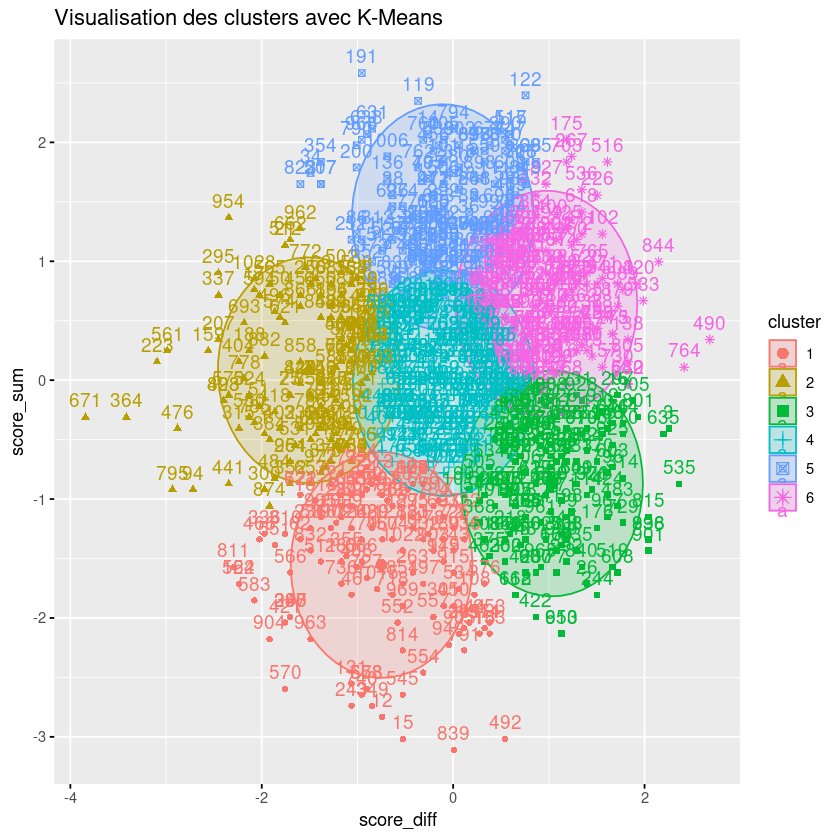

In [13]:
# Visualisation des clusters

# Visualisation des clusters dans l’espace des deux premières dimensions :

# Utilisation de factoextra pour représenter les clusters
fviz_cluster(kmeans_result, data = df_scaled, ellipse.type = "euclid") +
  ggtitle("Visualisation des clusters avec K-Means")

In [14]:
library(dplyr)
library(tidyr)

# Ajouter les clusters au dataframe original
df_pilot_2025$cluster <- as.factor(kmeans_result$cluster)

# Préparer les données pour pouvoir donner des noms aux clusters
df_pilot_2025 <- df_pilot_2025 %>%
  mutate(cluster_name = as.character(cluster))

# Créer des variables dummy
# Liste des clusters
clusters_uniques <- unique(df_pilot_2025$cluster)
# Création des variables
for (i in clusters_uniques) {
  df_pilot_2025[[paste0("cluster_", i)]] <- ifelse(df_pilot_2025$cluster == i, 1, 0)
}

In [15]:
# Sauvegarder les résultats du clustering
saveRDS(origines, file="../../_PrivateFolder_datagotchi_federal_2025/data/clustering/can2025/03_pilot_scale_origins.rds")
saveRDS(ecarts_types, file="../../_PrivateFolder_datagotchi_federal_2025/data/clustering/can2025/03_pilot_scale_ecarts_types.rds")
saveRDS(kmeans_result, file = "../../_PrivateFolder_datagotchi_federal_2025/data/clustering/can2025/03_pilot_kmeans.rds")
saveRDS(df_pilot_2025, file = "../../_PrivateFolder_datagotchi_federal_2025/data/clustering/can2025/03_pilot_2025.rds")